In [2]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
# import the data
df_train = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/test_data.csv')


In [5]:
#First first five row
df_train.head()


,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [6]:
#Last five rows of our data
df_train.tail()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
64371,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020-05-18,70.0,75.0,19695.0,281,2810.0,3583,7.01
64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,BANANA,2020-02-05,160.0,220.0,13560.0,72,1296.0,887,10.46
64373,TRANSVAAL,TS035,1M,3.5,TOMATOES-LONG LIFE,2020-08-20,20.0,20.0,6000.0,300,1050.0,900,5.71
64374,NATAL,BJ100,2M,10.0,LEMON,2020-08-18,50.0,80.0,16730.0,277,2770.0,372,6.04
64375,CAPE,M4183,1L,18.3,APPLE FUJI,2020-08-06,150.0,150.0,150.0,1,18.3,1,8.20


# All columns appear to be in good format
but we need eliminate other fruits from Commodities we are only interested to "GOLDEN DILICIOUSE APPLE" 

In [7]:
df_t = df_train.copy()
df_Apple_train = df_t.loc[df_t['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [8]:
# We get a quick overview of the data we use 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


we have taken note  that our 'Date' is an object we will convert it to datetype

In [9]:
#changing the Dtype of the 'Date'
pd.to_datetime( df_Apple_train['Date'])

1       2020-09-09
7       2020-04-14
24      2020-04-16
40      2020-05-04
69      2020-09-28
           ...    
64276   2020-03-04
64291   2020-02-22
64297   2020-04-22
64304   2020-03-04
64310   2020-04-23
Name: Date, Length: 1952, dtype: datetime64[ns]

In [10]:
#Now we are checking quantity of our columns and rows
df_Apple_train.shape

(1952, 13)

In [11]:
#Now we are chacking our missing values
df_Apple_train.isnull().sum()


Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

Perfect no missing values in our data.


# Univariate Analysis: Non-Graphical
The first univariate analysis will be non-graphical. This is where we will be looking at the descriptive statistics of each feature. We can get the descriptive statistics of each numerical feature by using the following command: df.describe()



In [12]:
df_Apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [13]:
# Now we are checking our individual columns
df_Apple_train.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [14]:
#  we check the  unique values v
df_Apple_train.nunique()

Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Commodities            1
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

In [15]:
#lets say you are only interest of checking of column first 3 rows and last 3
df_Apple_train['Sales_Total'].unique()

array([51710., 16000.,   990., ...,  4540.,  2140.,  9960.])

In [16]:
#checking  outliers in our dasets

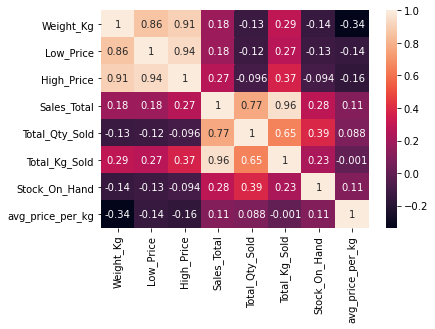

In [17]:
# relationship analysis between variables
corelation = df_Apple_train.corr()
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns,annot = True)


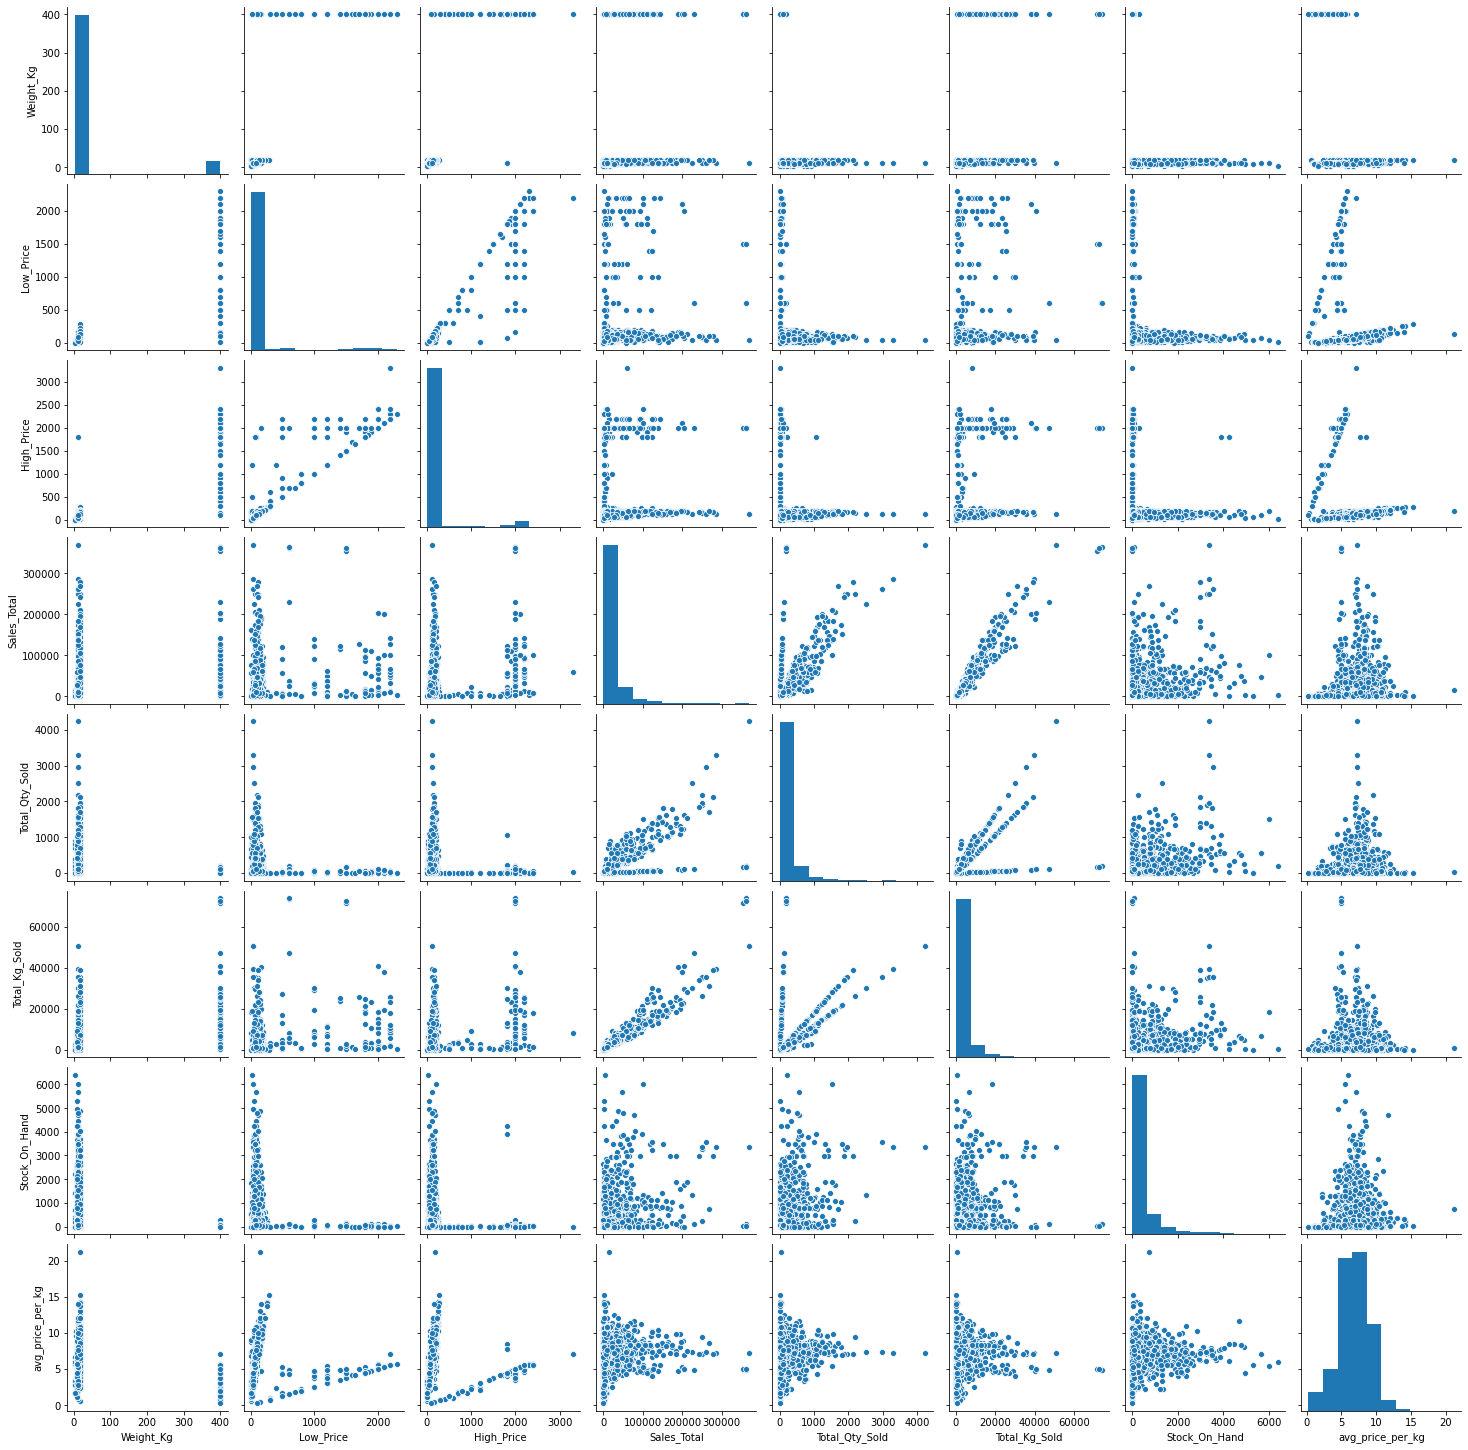

In [18]:
# pairplot  we can actual display that the relationship between two  numerical two variebles each a member of data cell gets plotted as a point whose left paranthesis relate to it 
sns.pairplot(df_Apple_train)

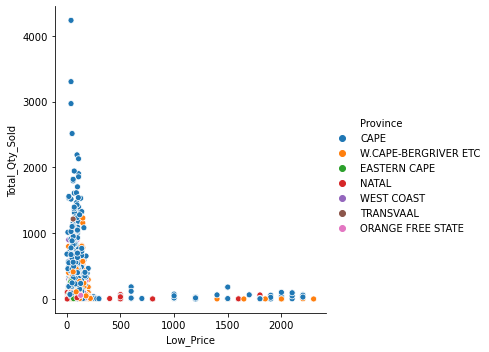

In [19]:
sns.relplot(x= 'Low_Price', y= 'Total_Qty_Sold', hue= 'Province', data= df_Apple_train)

In [20]:
test_ID = df_test['Index']

In [21]:
df_test = df_test.drop('Index', axis=1) # drop index for the test data, train data doesnt have index

In [22]:
df_train.head(5)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [23]:
df_test.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [24]:
df_test.shape

(685, 12)

In [25]:
df_train.shape

(64376, 13)

In [26]:
train=df_train.loc[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [27]:
test=df_test.loc[df_test['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [28]:
test.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [29]:
train.shape,test.shape

((1952, 13), (685, 12))

In [30]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [31]:
train.drop(['Commodities','Date'], axis=1, inplace=True) #df.drop(['B', 'C'], axis=1)

C:\Users\Richie\Anaconda_3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55


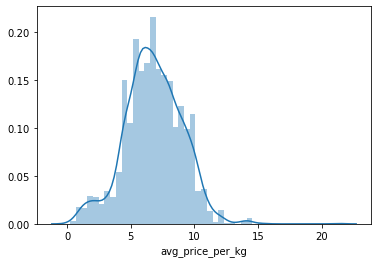

In [33]:
# target distribution
sns.distplot(train['avg_price_per_kg'],kde=True)

Data is normally distributed

### Dummy Variable Encoding

In [34]:
### START FUNCTION
def dummy_encode_titles(input_df):
    temp_df = input_df.copy()
    
    # Apply Dummy Encoding 
    temp_df = pd.get_dummies(temp_df, columns=['Province','Container','Size_Grade'], drop_first=True)
    
    return temp_df
### END FUNCTION

In [35]:
train_withDummy=dummy_encode_titles(train)

In [36]:
train_withDummy.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
train_withDummy.shape

(1952, 33)

## Correlation and Variable Selection

In [38]:
column_titles = [col for col in train_withDummy.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
train_withDummy=train_withDummy.reindex(columns=column_titles)

In [39]:
# Target correlations with features
corrs = pd.DataFrame(train_withDummy.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028
Total_Qty_Sold,0.087536


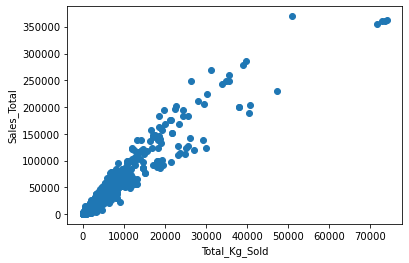

In [40]:
plt.scatter(train_withDummy['Total_Kg_Sold'],train_withDummy['Sales_Total'])
plt.ylabel("Sales_Total")
plt.xlabel("Total_Kg_Sold")
plt.show()

### Making Predictions

In [41]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [42]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = train_withDummy['avg_price_per_kg']
y.shape

(1952,)

In [43]:
# fit the model to the data and make predictions -Container_M4183
X = train_withDummy['Container_M4183'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.065617561699141,
 'Train R^2': 0.17226587611781263,
 'Test RMSE': 2.0260906116031947,
 'Test R^2': 0.11531344644437636}

In [44]:
# fit the model to the data and make predictions - all features
X = train_withDummy.drop('avg_price_per_kg',axis=1).values  #df.drop(['B', 'C'], axis=1)
y = train_withDummy['avg_price_per_kg']

fit_and_evaluate(model,X,y)

{'Train RMSE': 1.3966967172209797,
 'Train R^2': 0.621561554502444,
 'Test RMSE': 1.4430067099521682,
 'Test R^2': 0.5512459312372795}

In [45]:
 train_withDummy.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.55


# Saving the model

In [55]:
import pickle

model_save_path = "l_model.pkl"

with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

# Restoring our model using Pickle

In [56]:
model_load_path = "l_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

## Predicting on the test set

### Preprocessing

In [46]:
 train_withDummy.shape,df_test.shape

((1952, 33), (685, 12))

In [47]:
test.drop(['Commodities','Date'], axis=1, inplace=True) #df.drop(['B', 'C'], axis=1)

In [48]:
test_withDummy=dummy_encode_titles(test)

In [49]:
test_withDummy.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
#check missing values
test_withDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      685 non-null    float64
 1   Low_Price                      685 non-null    float64
 2   High_Price                     685 non-null    float64
 3   Sales_Total                    685 non-null    float64
 4   Total_Qty_Sold                 685 non-null    int64  
 5   Total_Kg_Sold                  685 non-null    float64
 6   Stock_On_Hand                  685 non-null    int64  
 7   Province_EASTERN CAPE          685 non-null    uint8  
 8   Province_NATAL                 685 non-null    uint8  
 9   Province_ORANGE FREE STATE     685 non-null    uint8  
 10  Province_TRANSVAAL             685 non-null    uint8  
 11  Province_W.CAPE-BERGRIVER ETC  685 non-null    uint8  
 12  Province_WEST COAST            685 non-null    uin

### Making predictions

In [51]:
preds = model.predict(test_withDummy)

In [52]:
preds

array([ 8.79713782,  9.13176513,  8.26845487,  8.03636817,  8.49387088,
        5.35024695,  5.36630919,  7.83973189,  8.85010799,  9.01953471,
        6.63552899,  6.65275888,  8.64555374,  5.26436922,  3.13752103,
        6.85471694,  7.6953211 ,  5.13600403,  9.40025709,  6.19083482,
        5.38154816,  4.91263203,  6.28717566,  6.67128947,  4.99927437,
        6.63841521,  7.65184408,  8.32683651,  8.56160152,  7.75226493,
        8.88538595,  5.08033147,  9.20810652,  7.61826973,  4.05074338,
        8.67495069,  8.36005759,  9.58002908,  5.92805617,  6.64857529,
        8.81875211,  8.53770783,  8.81302623,  5.10042563,  6.13263679,
        6.35585694,  4.18812851,  6.50802061,  6.08632587,  2.8295813 ,
        0.58919553,  5.09562655,  8.92322615,  8.70542887,  7.89046405,
        7.03368493,  8.32740679,  9.26702679,  9.03373241,  8.30976077,
        8.94788622,  9.59150067,  4.71814555,  8.11199768,  7.83290216,
        5.7905732 ,  5.10342077,  4.86529345,  6.52546839,  6.42

### Submission

In [53]:
# create submission dataframe

submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': preds
    })

In [54]:
submission

,Index,avg_price_per_kg
0,1,8.797138
1,2,9.131765
2,3,8.268455
3,4,8.036368
4,5,8.493871
...,...,...
680,681,6.000628
681,682,8.354622
682,683,6.001847
683,684,7.430271


In [54]:
# save DataFrame to csv file for submission
submission.to_csv("ZM2_theFirst.csv", index=False)